In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# %config InlineBackend.figure_format='retina'

In [2]:
# Data

n = 100
ct = np.arange(n)+1
e = 5*np.sin(ct*3*np.pi/n)+np.sin(ct*10*np.pi/n)
d = 1
D1 = 0.08
D2 = 0.025
D3 = 0.005

In [3]:
def cost(h :cp.Variable ,e:np.ndarray) -> float:
    """Returns the cost"""
    return cost_fill(h-e)+cost_cut(e-h)

def cost_fill(u : cp.Variable) -> float:
    """Returns the cost of filling"""
    u = cp.pos(u)
    return 2*cp.norm(u)**2+30*cp.sum(u)
    # return cp.sum(2*(u)**2+30*u)
def cost_cut(u : cp.Variable) -> float:
    """Returns the cost of cut"""
    u = cp.pos(u)
    return 12*cp.norm(u)**2+cp.sum(u)
    # return cp.sum(12*(u**2)+u)

In [4]:
h = cp.Variable(n)
constraints = []

constraints.append(cp.abs(cp.diff(h,1))<=D1)
constraints.append(cp.abs(cp.diff(h,2))<=D2)
constraints.append(cp.abs(cp.diff(h,3))<=D3)

objective = cp.Minimize(cost(h,e)) 

prob = cp.Problem(objective, constraints)

opt_cost = prob.solve(solver='ECOS_BB')
print("Optimal cost is",opt_cost)

Optimal cost is 7562.814734744382


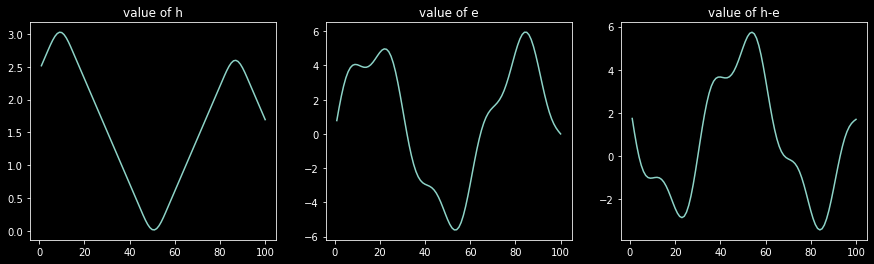

In [5]:
fig = plt.figure(figsize=(15,4))
fig.tight_layout(pad=3.0)
ax = fig.subplots(1,3)

x = np.arange(10,110)/10
x_axis = np.arange(1,101)

ax[0].plot(x_axis, h.value)
ax[0].set_title("value of h")
ax[1].plot(x_axis, e)
ax[1].set_title("value of e")
ax[2].plot(x_axis, h.value-e)
ax[2].set_title("value of h-e")

plt.show()

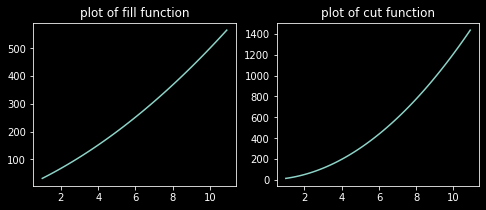

In [6]:
fig = plt.figure(figsize=(8,3))
ax = fig.subplots(1,2)
ax[0].plot(x, 2*(x)**2+30*(x))
ax[0].set_title("plot of fill function")

ax[1].plot(x, 12*(x)**2+(x))
ax[1].set_title("plot of cut function")


plt.show()

The above two plots clearly show that the functions are convex.